# 3 기술통계량 실습문제

***

In [1]:
# 아래와 같이 필요한 라이브러리를 임포트 합니다.
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# 소수점 3자리 숫자까지 표시
%precision 3

'%.3f'

In [2]:
data = pd.read_csv('health2018.csv')
data.head(5)

,ID,sex,age,height,weight,waist,BMI,Blood_glucose
0,A901020501,M,80,162.4,56.0,82.2,21.233226,103
1,A901021301,M,78,167.7,76.4,98.3,27.166096,127
2,A901021302,F,75,157.7,53.2,80.7,21.391845,134
3,A901022601,F,43,151.0,53.5,79.7,23.463883,99
4,A901023303,F,80,146.1,57.6,93.0,26.984977,111


### 1. 데이터 전체의 기술통계량(평균, 표준편차, 중간값)을 구해보시오.

In [3]:
data.mean()

age               51.339645
height           163.471498
weight            64.316354
waist             82.288003
BMI               23.962628
Blood_glucose    101.275972
dtype: float64

In [4]:
data.std()

age              16.688646
height            9.432172
weight           12.559136
waist            10.207824
BMI               3.523740
Blood_glucose    22.919817
dtype: float64

In [5]:
data.median()

age               52.000000
height           163.000000
weight            62.700000
waist             82.200000
BMI               23.639372
Blood_glucose     96.000000
dtype: float64

### 2. 남성과 여성의 기술통계량을 구하시오.
#### 2-1) 각 데이터(column)에 대해 남성과 여성의 평균을 구하시오.
어떤 값에서 남성과 여성의 차이가 크게 나는가? 남성과 여성의 차이가 적은 값은 어떤 것인지?

In [6]:
group = data.groupby("sex")
print(group.mean())

#신장과 몸무게에서 13차이 나이 , BMI에서 1 차이

           age      height     weight      waist        BMI  Blood_glucose
sex                                                                       
F    51.750600  157.536765  58.322749  78.811945  23.506471      98.462185
M    50.820182  170.973217  71.892489  86.681866  24.539227     104.832701


#### 2-2) 각 데이터(column)에 대해 남성과 여성의 표준편차를 구하시오.
전체 참가자의 표준편차에 비해 각 성별 내의 표준편차가 더 작아진 경우가 있다면? 이유는 무엇일까?

In [7]:
group = data.groupby("sex")
print(group.std())

#신장, 여자몸무게 ; 전체 평균을 구했을 때보다 성별 별로 평균을 구했을 때 값들이 평균에 더 가깝게 분포되어 있기 때문에   

           age    height     weight     waist       BMI  Blood_glucose
sex                                                                   
F    16.551982  6.583448   9.545901  9.713593  3.590340      19.401107
M    16.848615  6.770522  11.796092  9.060527  3.350641      26.288772


### 3. 히스토그램
#### 3-1) 전체 검사자에서 키(height)의 분포를 히스토그램으로 그리시오.

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


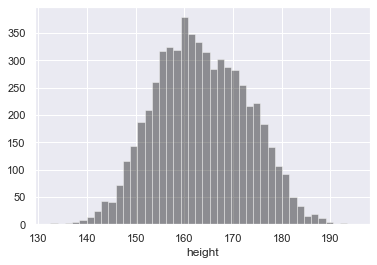

In [12]:
sns.distplot(data['height'], color = 'black', kde = False)

#### 3-2) 남성과 여성의 키(height) 분포를 히스토그램으로 그려 비교하시오.
가능하면 한 그림에 겹쳐서 나타낼 것. 남성을 파란색, 여성을 빨간색으로 표시할 것을 권장.
(힌트: ?sns.histplot 으로 함수 사용 도움말을 볼 수 있다)

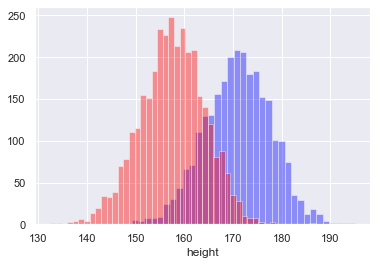

In [9]:
height_M = data.query('sex == "M"')["height"]
height_F = data.query('sex == "F"')["height"]
sns.distplot(height_M,color = 'blue', kde = False)
sns.distplot(height_F,color = 'red', kde = False)

#### 3-3) 남성/여성별로 체중(weight), 허리둘레(waist), 체질량지수(BMI)의 분포를 히스토그램으로 비교하시오.

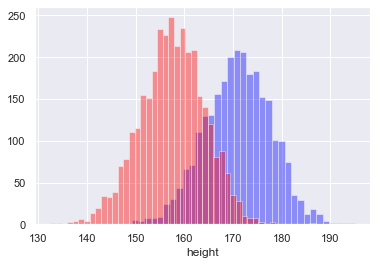

In [10]:
weight_M = data.query('sex == "M"')["weight"]
weight_F = data.query('sex == "F"')["weight"]
sns.distplot(height_M,color = 'blue', kde = False)
sns.distplot(height_F,color = 'red', kde = False)

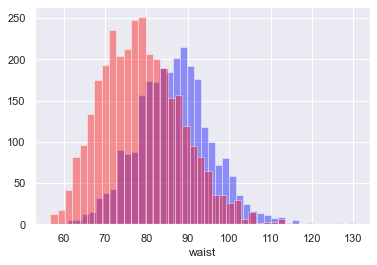

In [30]:
waist_M = data.query('sex == "M"')["waist"]
waist_F = data.query('sex == "F"')["waist"]
sns.distplot(height_M,color = 'blue', kde = False)
sns.distplot(height_F,color = 'red', kde = False)

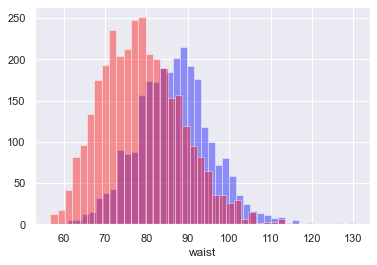

In [31]:
BMI_M = data.query('sex == "M"')["BMI"]
BMI_F = data.query('sex == "F"')["BMI"]
sns.distplot(height_M,color = 'blue', kde = False)
sns.distplot(height_F,color = 'red', kde = False)

#### 3-4) 3-2의 성별 키 분포 히스토그램에서 커널밀도추정 곡선을 같이 그려보시오.

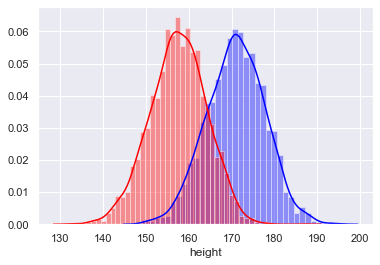

In [32]:
height_M = data.query('sex == "M"')["height"]
height_F = data.query('sex == "F"')["height"]
sns.distplot(height_M,color = 'blue', kde = True)
sns.distplot(height_F,color = 'red', kde = True)

### 4. (보너스 문제) 연령별 남성의 height 값 histogram을 그려 비교하시오.
하나의 그래프에 20대, 40-59세, 60-80세 남성의 height값 histogram을 겹쳐 그려 분포를 비교하시오. (과거에 비해 현재 세대 남성의 키가 더 큰가?)

(힌트: data.query()를 사용해 연령, 성별 조건을 지정할 수 있다. 단, 반드시 이 메소드를 쓸 필요는 없음)

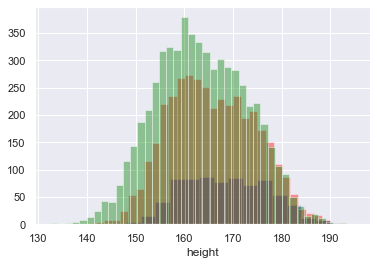

In [45]:
height_20 = data.query('sex == "M"' and 'age >= 20' and 'age < 30')["height"]
height_40 = data.query('sex == "M"' and 'age >= 40' and 'age <= 59')["height"]
height_60 = data.query('sex == "M"' and 'age >= 60' and 'age <= 80')["height"]
sns.distplot(height_20,color = 'blue', kde = False)
sns.distplot(height_40,color = 'red', kde = False)
sns.distplot(height_60,color = 'green', kde = False)